In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils



Using TensorFlow backend.


In [2]:

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION



# Downloading online data ( images matrix )

In [3]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#import matplotlib.pyplot as plt
#image_index = 7777 # You may select anything up to 60,000
#print(y_train[image_index]) # The label is 8
#plt.imshow(X_train[image_index], cmap='Greys')

In [6]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



In [7]:
X_train[1].shape

(784,)

In [8]:

# normalize 
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



60000 train samples
10000 test samples


In [9]:
print(y_train)

[5 0 4 ... 5 6 8]


# ONE HOT ENCODING

In [10]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)



In [11]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# DEFINING MODEL

In [12]:
# 10 outputs
# final stage is softmax

model = Sequential()

# Add an input layer 
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# Loss fuction or objective function
model.add(Activation('softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])



# TRAINING MODEL

In [14]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 6s 133us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 -

Epoch 118/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2902 - acc: 0.9192 - val_loss: 0.2846 - val_acc: 0.9212
Epoch 119/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2900 - acc: 0.9191 - val_loss: 0.2844 - val_acc: 0.9212
Epoch 120/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2898 - acc: 0.9192 - val_loss: 0.2842 - val_acc: 0.9212
Epoch 121/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2895 - acc: 0.9191 - val_loss: 0.2841 - val_acc: 0.9212
Epoch 122/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2892 - acc: 0.9192 - val_loss: 0.2840 - val_acc: 0.9212
Epoch 123/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2890 - acc: 0.9194 - val_loss: 0.2838 - val_acc: 0.9211
Epoch 124/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2888 - acc: 0.9197 - val_loss: 0.2837 - val_acc: 0.9210
Epoch 125/200
48000/

# Model Performance [ Accuracy ]

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
#print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.9227


In [16]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


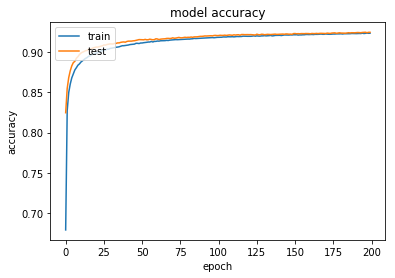

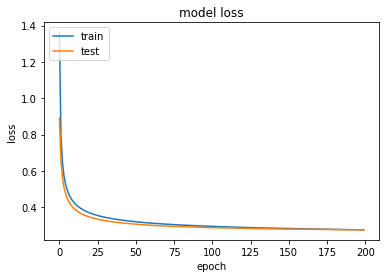

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()